In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("election_results_2024.csv")
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


<Axes: ylabel='Leading Party'>

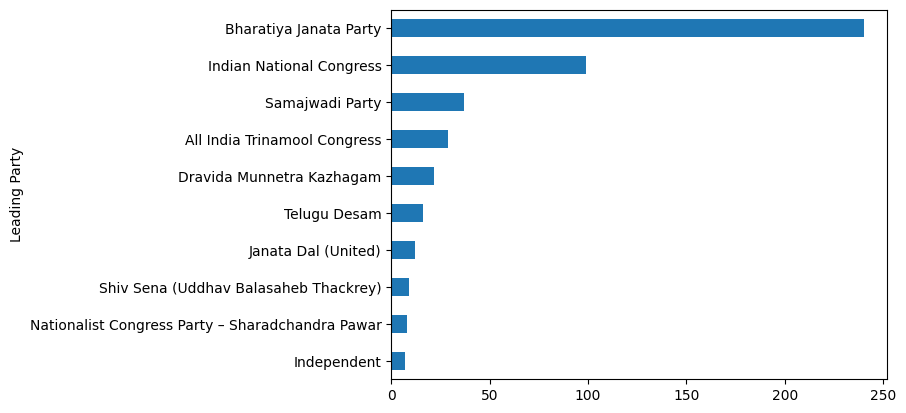

In [12]:
count = df.groupby("Leading Party").count().iloc[:,0]
count = count.sort_values()
count[-10:].plot(kind="barh")

In [20]:
df.dropna(inplace=True)

In [22]:
df["Margin"] = df.Margin.apply(eval)

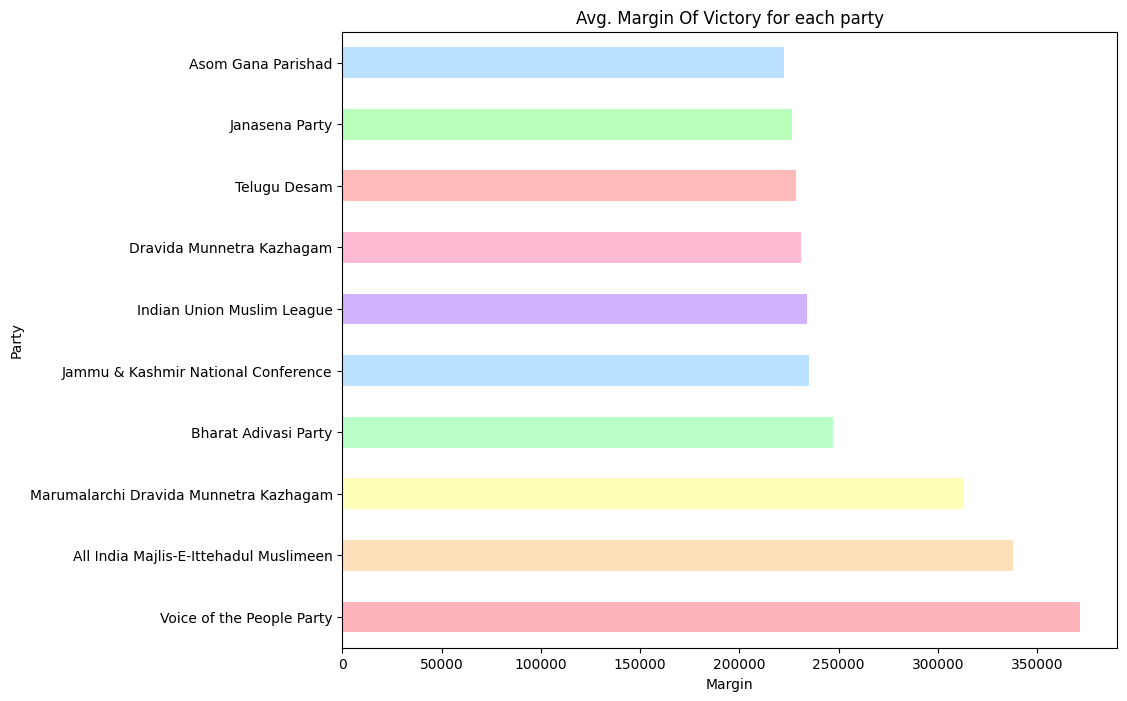

In [39]:
avg_margin = df.groupby("Leading Party")["Margin"].mean()
avg_margin = avg_margin.sort_values(ascending=False)
pastel_colors = [
    "#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF",
    "#D3B3FF", "#FFBAD3", "#FFBABA", "#BAFFBA", "#BAE1FF"
]
plt.figure(figsize=(10,8))
avg_margin[:10].plot(kind="barh", color=pastel_colors)
plt.xlabel("Margin")
plt.ylabel("Party")
plt.title("Avg. Margin Of Victory for each party")
plt.show()

In [41]:
top_parties = df["Leading Party"].value_counts()
top_parties = top_parties[:5]
top_parties

Leading Party
Bharatiya Janata Party          239
Indian National Congress         99
Samajwadi Party                  37
All India Trinamool Congress     29
Dravida Munnetra Kazhagam        22
Name: count, dtype: int64

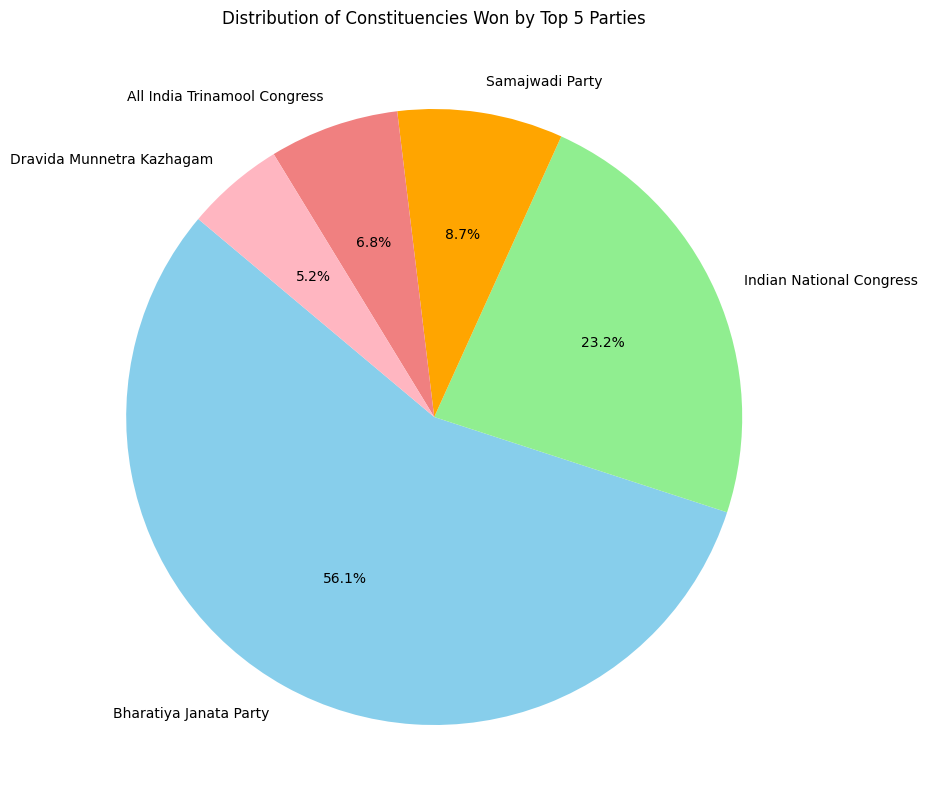

In [43]:
plt.figure(figsize=(10,10))
df["Leading Party"].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'orange', 'lightcoral', 'lightpink'])
plt.title('Distribution of Constituencies Won by Top 5 Parties')
plt.ylabel('')  # Hide the y-label
plt.show()

In [54]:
bjp_data = df[df["Leading Party"] == "Bharatiya Janata Party"]
bjp_highest_margin = bjp_data.nlargest(5, "Margin")

<Figure size 1200x800 with 0 Axes>

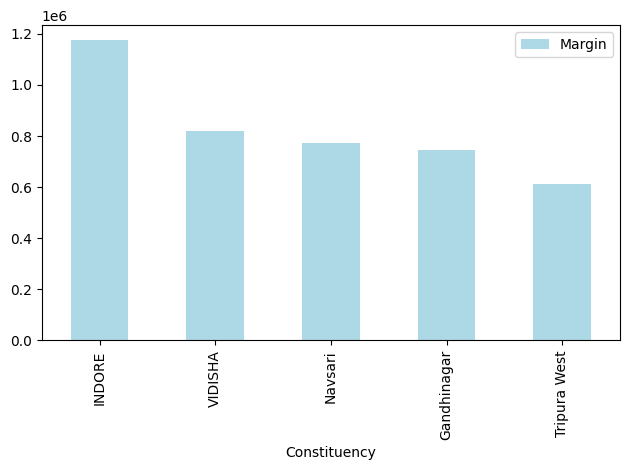

In [53]:
plt.figure(figsize=(12,8))
bjp_highest_margin_plot = bjp_highest_margin[['Constituency', 'Margin']].set_index('Constituency')
bjp_highest_margin_plot.plot(kind="bar", color="lightblue")
plt.tight_layout()
plt.show()

In [55]:
bjp_loss = df[df["Trailing Party"] == "Bharatiya Janata Party"]
bjp_highest_loss = bjp_loss.nlargest(5, "Margin")

<Figure size 1200x800 with 0 Axes>

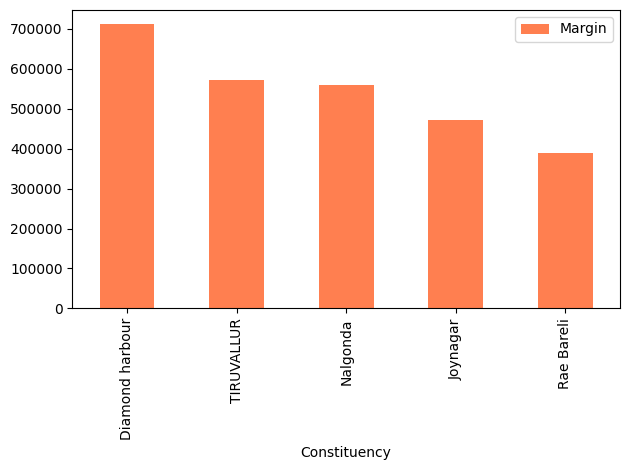

In [56]:
bjp_highest_loss_plot = bjp_highest_loss[["Constituency", "Margin"]].set_index("Constituency")
plt.figure(figsize=(12,8))
bjp_highest_loss_plot.plot(kind="bar", color="coral")
plt.tight_layout()
plt.show()

In [58]:
cong_bjp = df[df["Leading Party"] == "Indian National Congress"]
cong_bjp = cong_bjp[cong_bjp["Trailing Party"] == "Bharatiya Janata Party"]
cong_bjp = cong_bjp.nlargest(5, "Margin")

<Axes: xlabel='Constituency'>

<Figure size 1200x800 with 0 Axes>

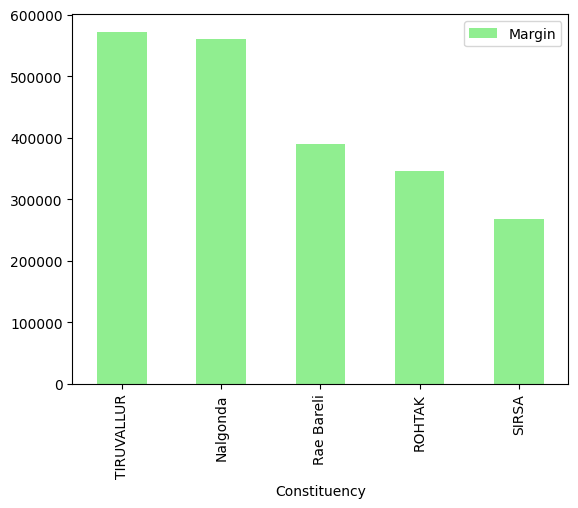

In [59]:
plt.figure(figsize=(12,8))
cong_bjp_plot = cong_bjp[["Constituency", "Margin"]].set_index("Constituency")
cong_bjp_plot.plot(kind="bar", color="lightgreen")

In [65]:
tmc_bjp = df[df["Leading Party"] == "All India Trinamool Congress"]
tmc_bjp = tmc_bjp[tmc_bjp["Trailing Party"] == "Bharatiya Janata Party"]
tmc_bjp = tmc_bjp.nlargest(5, "Margin")

<Axes: xlabel='Constituency'>

<Figure size 1200x800 with 0 Axes>

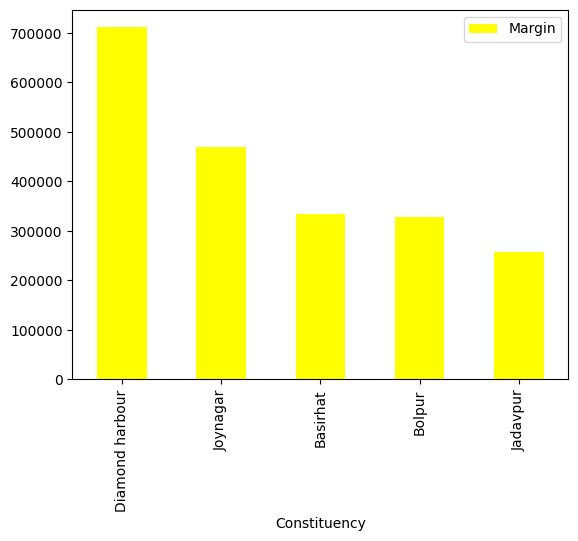

In [66]:
plt.figure(figsize=(12,8))
tmc_bjp_plot = tmc_bjp[["Constituency", "Margin"]].set_index("Constituency")
tmc_bjp_plot.plot(kind="bar", color="yellow")

In [68]:
constituencies = df["Constituency"].unique()

In [83]:
import time
import urllib.parse
import requests
import folium

In [77]:
def get_coordinates(address):
    base_url = 'https://nominatim.openstreetmap.org/search'
    params = {
        'q': address,
        'format': 'json',
        'addressdetails': 1,
        'limit': 1
    }
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Referer': 'https://www.google.com/'
    }
    try:
        encoded_params = {k: urllib.parse.quote(v) if isinstance(v, str) else v for k, v in params.items()}
        response = requests.get(base_url, params=encoded_params, headers=headers)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
        results = response.json()
        if results:
            location = results[0]
            return location['lat'], location['lon']
        else:
            return None, None
    except requests.exceptions.RequestException as e:
        print(f"Request error: {e}")
        return None, None
    except ValueError as e:
        print(f"Error parsing JSON: {e}")
        return None, None
coordinates = []
for address in constituencies:
    lat, lon = get_coordinates(address)
    coordinates.append((address, lat, lon))
    time.sleep(1)

In [81]:
df_coordinates = pd.DataFrame(coordinates, columns=["Constituency", "Latitude", "Longitude"])
df_coords = pd.merge(df, df_coordinates, on="Constituency")

In [82]:
df_coords

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status,Latitude,Longitude
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared,26.4691,74.639
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared,27.5,76.5
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared,30.3843674,76.770421
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared,None,None
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared,13.0839782,79.6700892
...,...,...,...,...,...,...,...,...,...,...
537,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared,20.735706399999998,78.55649896377687
538,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared,11.71512915,76.12711850740615
539,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared,None,None
540,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared,None,None


In [88]:
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
df_coords = df_coords.dropna()
party_colors = {
    'Bharatiya Janata Party': 'pink',
    'Indian National Congress': 'blue',
    'All India Trinamool Congress': 'red',
    'Dravida Munnetra Kazhagam': 'green',
    'Aam Aadmi Party': 'green',
    'Samajwadi Party': 'green',
    'Independent': 'green'  # Others
}
def save_map_to_html(map_object, filename):
    """
    Save a Folium map object to an HTML file.
    
    Parameters:
    - map_object: Folium Map object
    - filename: str, name of the HTML file to save the map
    
    Returns:
    - None
    """
    map_object.save(filename)
for index, row in df_coords.iterrows():
    color = party_colors.get(row['Leading Party'], 'green')
    folium.Marker(
    location = [row['Latitude'], row['Longitude']],
    popup = f"{row['Constituency']}: {row['Leading Party']} (Margin: {row['Margin']})",
    icon=folium.Icon(color=color)
    ).add_to(india_map)
filename = 'india_election_map_cleaned.html'
save_map_to_html(india_map, filename)

print(f"Map saved to {filename}")

Map saved to india_election_map_cleaned.html
